In [1]:
"""
BigQuery Machine Learning 

This is data analysis using Structured Query Language (SQL)
SQL is a tool for every data scientist for getting access to data, 
and for advance data analysis.
Designing the data stracture properly is very important, 
it is adversable to devide data to many tables, and not stored all in one place

Using build SQL using BigQuery
BigQuery is a Google Cloud product for storing and accessing very large databases

In order to follow this tutorial, you must create a google cloud acccount and allow Bigquery

Create a Client object that will play a central role in retrieving information  from BigQuery datasets.
BigQuery is a web service that lets you apply SQL to huge datasets
This can give error if you do not create your google cloud  account and also export downloaded key as:
export GOOGLE_APPLICATION_CREDENTIALS="my-google-cloud-key.json

The detail of how to creat google cloud account and enable bigquery can be found at:
https://cloud.google.com/iam/docs/creating-managing-service-account-keys
https://codelabs.developers.google.com/codelabs/cloud-bigquery-python#1

Then you have to install google.cloud into your python enviroment


"""

'This is data analysis using Structured Query Language (SQL)\nSQL is a tool for every data scientist for getting access to data, \nand for advance data analysis.\nDesigning the data stracture properly is very important, \nit is adversable to devide data to many tables, and not stored all in one place\n\nUsing build SQL using BigQuery\nBigQuery is a Google Cloud product for storing and accessing very large databases\n\nThe notebook will cover:\nTable creation\ninserting / updating data in the DB\nfunctions - gets a value as an input, and returns manipulation of that value '

In [5]:
# import our bigquery
from google.cloud import bigquery 
import numpy as np
import pandas as pd
import os
from google.cloud import bigquery
from google.cloud.exceptions import NotFound
from sqlalchemy import create_engine
import sqlite3
import matplotlib.pyplot as plt
from google.cloud.bigquery import magics

In [4]:
"""
Call the project ID already exits in the cloud "PROJECT_ID = name_of_your_project"
Create a dataset in the cloud called bqml_tutorial

Take note that "client.create_dataset" command will not work if you do not create necessary permission 
on your google cloud bigquery 
"""
PROJECT_ID = 'YourProjectIDfromCloud'
client = bigquery.Client(project=PROJECT_ID, location="US")
dataset = client.create_dataset('bqml_tutorial', exists_ok=True)

In [8]:
"""
In this tutorial, I will make use of the 
Google Analytics sample dataset to predict whether a website visitor will make a transaction.
"""
# Set your own project id here


# Create a "Client" object
client = bigquery.Client()
 
dataset_ref = client.dataset("google_analytics_sample", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

#dataset
list(client.list_tables(dataset))


#You will get list of the Tables

In [9]:
#We use the list_tables() method to list the tables in the dataset.

# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)
    
#You will get list of the Tables id

ga_sessions_20160801
ga_sessions_20160802
ga_sessions_20160803
ga_sessions_20160804
ga_sessions_20160805
ga_sessions_20160806
ga_sessions_20160807
ga_sessions_20160808
ga_sessions_20160809
ga_sessions_20160810
ga_sessions_20160811
ga_sessions_20160812
ga_sessions_20160813
ga_sessions_20160814
ga_sessions_20160815
ga_sessions_20160816
ga_sessions_20160817
ga_sessions_20160818
ga_sessions_20160819
ga_sessions_20160820
ga_sessions_20160821
ga_sessions_20160822
ga_sessions_20160823
ga_sessions_20160824
ga_sessions_20160825
ga_sessions_20160826
ga_sessions_20160827
ga_sessions_20160828
ga_sessions_20160829
ga_sessions_20160830
ga_sessions_20160831
ga_sessions_20160901
ga_sessions_20160902
ga_sessions_20160903
ga_sessions_20160904
ga_sessions_20160905
ga_sessions_20160906
ga_sessions_20160907
ga_sessions_20160908
ga_sessions_20160909
ga_sessions_20160910
ga_sessions_20160911
ga_sessions_20160912
ga_sessions_20160913
ga_sessions_20160914
ga_sessions_20160915
ga_sessions_20160916
ga_sessions_2

In [10]:
#Similar to how we fetched a dataset, we can fetch a table. 
#In the code cell below, we fetch the full table in the hacker_news dataset.

# Construct a reference to the "full" table. If the data reference is of the 
#same name and you want to access all like those of Google Anlytics, you can use ga_sessions_*
table_ref = dataset_ref.table("ga_sessions_*")

# API request - fetch the table
table = client.get_table(table_ref)

In [11]:
#Let use Table Schema which is the structure of a table 
# Print information on all the columns in the "full" table in the 
#"hacker_news" dataset
table.schema

#You will get the list of Table Schema

[SchemaField('visitorId', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('visitNumber', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('visitId', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('visitStartTime', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('date', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('totals', 'RECORD', 'NULLABLE', None, (SchemaField('visits', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('hits', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('pageviews', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('timeOnSite', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('bounces', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('transactions', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('transactionRevenue', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('newVisits', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('screenviews', 'INTEGER', 'NULLABLE', None, (), None), SchemaField('uniqueScreenview

In [12]:
#use the list_rows() method to check just the first five lines of of the full table to make sure this is right.
# Preview the first five lines of the "full" table
client.list_rows(table, max_results=5).to_dataframe()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,<NA>,1,1501583974,1501583974,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Car...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2248281639583218707,None,None,Organic Search,Not Socially Engaged
1,<NA>,1,1501616585,1501616585,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",8647436381089107732,None,None,Organic Search,Not Socially Engaged
2,<NA>,1,1501583344,1501583344,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2055839700856389632,None,None,Organic Search,Not Socially Engaged
3,<NA>,1,1501573386,1501573386,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 0, 'minut...",0750846065342433129,None,None,Direct,Not Socially Engaged
4,<NA>,8,1501651467,1501651467,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 22, 'minu...",0573427169410921198,None,None,Organic Search,Not Socially Engaged


In [13]:
#You can get the information from a specific field for a whole column using the syntax 
#COLUMN_NAME.FIELD_NAME
# create a small sample dataframe
sample_table = client.list_rows(table, max_results=22).to_dataframe()

# get the first cell in the "totals" column
sample_table.totals[0]


{'visits': 1,
 'hits': 1,
 'pageviews': 1,
 'timeOnSite': None,
 'bounces': 1,
 'transactions': None,
 'transactionRevenue': None,
 'newVisits': 1,
 'screenviews': None,
 'uniqueScreenviews': None,
 'timeOnScreen': None,
 'totalTransactionRevenue': None,
 'sessionQualityDim': 1}

In [16]:
#Accessing distincs values of the dictionary in the column of interest
#Let use BigQueryHelper
from bq_helper import BigQueryHelper

dataset1 = BigQueryHelper("bigquery-public-data", "google_analytics_sample")

query4a = """SELECT  DISTINCT(totals.transactions) AS transactions
                                FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
                               ; """
df4a = dataset1.query_to_pandas_safe(query4a)
df4a.head(20)

,transactions
0,5
1,21
2,7
3,<NA>
4,8
5,6
6,25
7,15
8,2
9,10


In [17]:
"""

To create a logistic regression model for classification.
The standard SQL query uses a CREATE MODEL statement to create and train the model. 
You can find the documentation for this fuction at: 
https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-create#model_type

The BigQuery Python client library provides a custom magic command so that you don't need to set 
up the queries yourself. 
To load the magic commands from the client library, run the following code.

The BigQuery client library provides a cell magic, %%bigquery, which runs a SQL query and returns 
the results as a Pandas DataFrame.
Once you use this command the rest of your cell will be treated as a SQL command.

Take not that %%bigquery has to start a cell in jupyter befor it will work
You can also use different options like linear_reg, logistic_reg
"""

from google.cloud import bigquery

%load_ext google.cloud.bigquery
#%load_ext is one of the many Jupyter built-in magic commands


In [18]:
%%bigquery
CREATE MODEL IF NOT EXISTS `bqml_tutorial.sample_model`
OPTIONS(model_type='logistic_reg') AS
SELECT
  IF(totals.transactions IS NULL, 0, totals.transactions) AS label,
  IFNULL(device.operatingSystem, "") AS os,
  device.isMobile AS is_mobile,
  IFNULL(geoNetwork.country, "") AS country,
  IFNULL(totals.pageviews, 0) AS pageviews
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE
  _TABLE_SUFFIX BETWEEN '20160801' AND '20180630'

Query complete after 0.01s: 100%|██████████| 1/1 [00:00<00:00, 1933.75query/s] 


""


In [ ]:
"""
After the first iteration is complete, your model (sample_model) appears in the navigation panel
of the BigQuery UI. Because the query uses a CREATE MODEL statement to create a table,
you do not see query results. The output is an empty string.

Get training statistics
To see the results of the model training, you can use the ML.TRAINING_INFO function, or you can 
view the statistics in the BigQuery UI. In this tutorial, you use the ML.TRAINING_INFO function.
At this point you'll notice that BQML will take care of some of the common ML decisions for you:
Splitting into training & evaluation datasets to help detect overfitting
"""



In [19]:
%%bigquery
SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `bqml_tutorial.sample_model`)
ORDER BY iteration

Downloading: 100%|██████████| 9/9 [00:03<00:00,  2.84rows/s]


,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,0,0.138679,0.138678,0.2,16055
1,0,1,0.063884,0.063877,0.4,22225
2,0,2,0.016171,0.016139,0.8,21256
3,0,3,0.008696,0.008652,1.6,22388
4,0,4,0.006199,0.006208,3.2,23683
5,0,5,0.004828,0.005002,6.4,21211
6,0,6,0.004167,0.004435,12.8,22149
7,0,7,0.003782,0.003840,25.6,21548
8,0,8,0.003657,0.003812,6.4,33012


In [ ]:
"""
Step four: Evaluate your model
After creating your model, you evaluate the performance of the classifier using the ML.EVALUATE 
function.
To run the ML.EVALUATE query that evaluates the model, run the following:
"""

In [20]:
%%bigquery
SELECT
  *
FROM ML.EVALUATE(MODEL `bqml_tutorial.sample_model`, (
  SELECT
    IF(totals.transactions IS NULL, 0, totals.transactions) AS label,
    IFNULL(device.operatingSystem, "") AS os,
    device.isMobile AS is_mobile,
    IFNULL(geoNetwork.country, "") AS country,
    IFNULL(totals.pageviews, 0) AS pageviews
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
  WHERE
    _TABLE_SUFFIX BETWEEN '20170701' AND '20170801'))

Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.70s/rows]


,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.100996,0.07853,0.985262,0.082587,4.353451,0.332577


In [ ]:
"""
It is good to compare the mean absolute error from the EVALUATE to that of the TRAINING
and to see if there is a little difference. A little difference like 
7 minutes is similar to the value of 6.7784 shows that the ML model maintains 
its performance on a dataset is different from the training one.
We can say that the model is not affected by overfitting.

While it's helpful to see these metrics, it's also common to plot the ROC curve when evaluating 
model performance for binary logistic  regression.

Pro-tip: You can save the output of a bigquery magic cell by putting a variable name to the right 
of the %%bigquery command. 
"""


In [21]:
%%bigquery roc
SELECT
  *
FROM
  ML.ROC_CURVE(MODEL `bqml_tutorial.sample_model`)
    
#You can get ROC error message if the analysis did not produce any ROC result


Executing query with job ID: f84283af-e333-4d21-bb55-a0c78ffb185b
Query executing: 1.69s


ERROR:
 400 Invalid table-valued function ML.ROC_CURVE
The ROC curve metrics of the model was not calculated during training. Please provide the data to calculate the ROC curve of the model with. at [4:3]

Location: US
Job ID: f84283af-e333-4d21-bb55-a0c78ffb185b



In [37]:
# check out the data that was returned...
roc.head()

,threshold,recall,false_positive_rate,true_positives,false_positives,true_negatives,false_negatives
0,1.000000,0.008197,0.000000,1,0,9992,121
1,0.252477,0.319672,0.006605,39,66,9926,83
2,0.101970,0.549180,0.013811,67,138,9854,55
3,0.059840,0.696721,0.022718,85,227,9765,37
4,0.044989,0.819672,0.030725,100,307,9685,22


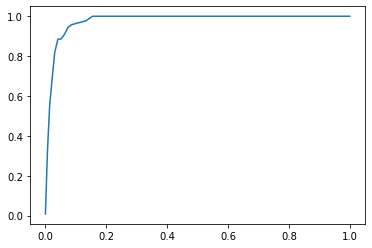

In [38]:
# and plot our ROC curve!
import matplotlib.pyplot as plt

# plot the false positive rate by true postive rate (aka recall)
plt.plot(roc.false_positive_rate, roc.recall)

In [ ]:
"""Step five: Use your model to predict outcomes
Now that you have evaluated your model, the next step is to use it to predict outcomes. 
You use your model to predict the number of transactions made by website visitors from each country.
And you use it to predict purchases per user.
"""

In [22]:
%%bigquery
SELECT
  country,
  SUM(label) as total_purchases,
  SUM(predicted_label) as total_predicted_purchases,
  ABS(SUM(label) - SUM(predicted_label)) difference_in_purchase
FROM ML.PREDICT(MODEL `bqml_tutorial.sample_model`, (
  SELECT
    IF(totals.transactions IS NULL, 0, totals.transactions) AS label,
    IFNULL(device.operatingSystem, "") AS os,
    device.isMobile AS is_mobile,
    IFNULL(totals.pageviews, 0) AS pageviews,
    IFNULL(geoNetwork.country, "") AS country
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
  WHERE
    _TABLE_SUFFIX BETWEEN '20170701' AND '20170801'))
  GROUP BY country
  ORDER BY total_predicted_purchases DESC
  LIMIT 10

Downloading: 100%|██████████| 10/10 [00:02<00:00,  3.59rows/s]


,country,total_purchases,total_predicted_purchases,difference_in_purchase
0,United States,1073,220,853
1,Taiwan,0,5,5
2,Canada,19,4,15
3,India,1,2,1
4,Turkey,0,2,2
5,Japan,0,2,2
6,St. Lucia,1,1,0
7,Brazil,0,1,1
8,Indonesia,2,1,1
9,Venezuela,0,1,1


In [ ]:
"""
In the next example, you try to predict the number of transactions each website visitor will 
make. Here the GROUP BY clause — GROUP BY fullVisitorId — is used to group the results by visitor ID.
"""


In [23]:
%%bigquery
SELECT
  fullVisitorId,
  SUM(label) as total_purchases,
  SUM(predicted_label) as total_predicted_purchases,
  ABS(SUM(label) - SUM(predicted_label)) difference_in_purchase
FROM ML.PREDICT(MODEL `bqml_tutorial.sample_model`, (
  SELECT
    IF(totals.transactions IS NULL, 0, totals.transactions) AS label,
    IFNULL(device.operatingSystem, "") AS os,
    device.isMobile AS is_mobile,
    IFNULL(totals.pageviews, 0) AS pageviews,
    IFNULL(geoNetwork.country, "") AS country,
    fullVisitorId
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
  WHERE
    _TABLE_SUFFIX BETWEEN '20170701' AND '20170801'))
  GROUP BY fullVisitorId
  ORDER BY total_predicted_purchases DESC
  LIMIT 10

Downloading: 100%|██████████| 10/10 [00:02<00:00,  3.86rows/s]


,fullVisitorId,total_purchases,total_predicted_purchases,difference_in_purchase
0,9417857471295131045,9,4,5
1,0456807427403774085,1,2,1
2,1280993661204347450,2,2,0
3,5073919761051630191,0,2,2
4,806992249032686650,3,2,1
5,8064625150033508396,1,2,1
6,1712066703099487652,1,2,1
7,7420300501523012460,2,2,0
8,2969418676126258798,1,2,1
9,489038402765684003,0,2,2


In [ ]:
"""
Try a new set of data training set where all the NULL values in the some selected 
variables are dropped

Whenever you want to change the data training selection, you make sure you delete
the previous one in your bigquery at the google cloud in AIM

Take note also that the %%bigquery SQL is not ending with ";" like normal SQL
"""

In [24]:
%%bigquery
CREATE MODEL IF NOT EXISTS `bqml_tutorial.sample_model`
OPTIONS(model_type='logistic_reg') AS
SELECT
  IF(totals.transactions IS NULL, 0, totals.transactions) AS label,
  device.operatingSystem AS os,
  device.isMobile AS is_mobile,
  geoNetwork.country AS country,
  IFNULL(totals.pageviews, 0) AS pageviews
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE
   device.operatingSystem IS NOT NULL AND
   device.isMobile  IS NOT NULL AND
   geoNetwork.country IS NOT NULL AND
    _TABLE_SUFFIX BETWEEN '20160801' AND '20170630'

Query complete after 0.00s: 100%|██████████| 1/1 [00:00<00:00, 662.29query/s] 


""


In [25]:
%%bigquery
SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `bqml_tutorial.sample_model`)
ORDER BY iteration

Downloading: 100%|██████████| 9/9 [00:02<00:00,  3.35rows/s]


,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,0,0.138679,0.138678,0.2,16055
1,0,1,0.063884,0.063877,0.4,22225
2,0,2,0.016171,0.016139,0.8,21256
3,0,3,0.008696,0.008652,1.6,22388
4,0,4,0.006199,0.006208,3.2,23683
5,0,5,0.004828,0.005002,6.4,21211
6,0,6,0.004167,0.004435,12.8,22149
7,0,7,0.003782,0.003840,25.6,21548
8,0,8,0.003657,0.003812,6.4,33012


In [26]:
%%bigquery
SELECT
  *
FROM ML.EVALUATE(MODEL `bqml_tutorial.sample_model`, (
  SELECT
    IF(totals.transactions IS NULL, 0, totals.transactions) AS label,
  device.operatingSystem AS os,
  device.isMobile AS is_mobile,
  geoNetwork.country AS country,
    IFNULL(totals.pageviews, 0) AS pageviews
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
  WHERE
   device.operatingSystem IS NOT NULL AND
   device.isMobile  IS NOT NULL AND
   geoNetwork.country IS NOT NULL AND
    _TABLE_SUFFIX BETWEEN '20170701' AND '20170801'))

Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.76s/rows]


,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.100996,0.07853,0.985262,0.082587,4.353451,0.332583


In [27]:
%%bigquery roc
SELECT
  *
FROM
  ML.ROC_CURVE(MODEL `bqml_tutorial.sample_model`)


Executing query with job ID: d5c5a658-2605-4fc3-9935-daf0bcd6d903
Query executing: 2.60s


ERROR:
 400 Invalid table-valued function ML.ROC_CURVE
The ROC curve metrics of the model was not calculated during training. Please provide the data to calculate the ROC curve of the model with. at [4:3]

Location: US
Job ID: d5c5a658-2605-4fc3-9935-daf0bcd6d903



In [66]:
# check out the data that was returned...
roc.head()

,threshold,recall,false_positive_rate,true_positives,false_positives,true_negatives,false_negatives
0,1.000000,0.008197,0.000000,1,0,9992,121
1,0.252477,0.319672,0.006605,39,66,9926,83
2,0.104013,0.540984,0.013811,66,138,9854,56
3,0.059840,0.696721,0.022718,85,227,9765,37
4,0.044989,0.819672,0.030725,100,307,9685,22


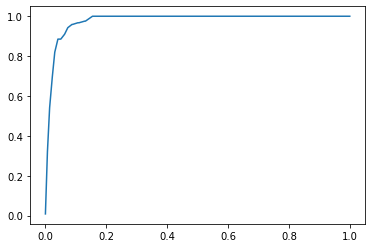

In [67]:
# and plot our ROC curve!
import matplotlib.pyplot as plt

# plot the false positive rate by true postive rate (aka recall)
plt.plot(roc.false_positive_rate, roc.recall)

In [28]:
%%bigquery
SELECT
  country,
  SUM(label) as total_purchases,
  SUM(predicted_label) as total_predicted_purchases,
  ABS(SUM(label) - SUM(predicted_label)) difference_in_purchase
FROM ML.PREDICT(MODEL `bqml_tutorial.sample_model`, (
  SELECT
    IF(totals.transactions IS NULL, 0, totals.transactions) AS label,
  device.operatingSystem AS os,
  device.isMobile AS is_mobile,
  geoNetwork.country AS country,
    IFNULL(totals.pageviews, 0) AS pageviews,
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
  WHERE
   device.operatingSystem IS NOT NULL AND
   device.isMobile  IS NOT NULL AND
   geoNetwork.country IS NOT NULL AND
    _TABLE_SUFFIX BETWEEN '20170701' AND '20170801'))
  GROUP BY country
  ORDER BY total_predicted_purchases DESC
  LIMIT 10

Downloading: 100%|██████████| 10/10 [00:02<00:00,  3.67rows/s]


,country,total_purchases,total_predicted_purchases,difference_in_purchase
0,United States,1073,220,853
1,Taiwan,0,5,5
2,Canada,19,4,15
3,India,1,2,1
4,Turkey,0,2,2
5,Japan,0,2,2
6,Australia,0,1,1
7,Serbia,0,1,1
8,Italy,1,1,0
9,Singapore,0,1,1


In [29]:
%%bigquery
SELECT
  fullVisitorId,
  SUM(label) as total_purchases,
  SUM(predicted_label) as total_predicted_purchases,
  ABS(SUM(label) - SUM(predicted_label)) difference_in_purchase
FROM ML.PREDICT(MODEL `bqml_tutorial.sample_model`, (
  SELECT
    IF(totals.transactions IS NULL, 0, totals.transactions) AS label,
    device.operatingSystem AS os,
    device.isMobile AS is_mobile,
    geoNetwork.country AS country,
    IFNULL(totals.pageviews, 0) AS pageviews,
    fullVisitorId
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
  WHERE
   device.operatingSystem IS NOT NULL AND
   device.isMobile  IS NOT NULL AND
   geoNetwork.country IS NOT NULL AND
    _TABLE_SUFFIX BETWEEN '20170701' AND '20170801'))
  GROUP BY fullVisitorId
  ORDER BY total_predicted_purchases DESC
  LIMIT 10

Downloading: 100%|██████████| 10/10 [00:02<00:00,  3.93rows/s]


,fullVisitorId,total_purchases,total_predicted_purchases,difference_in_purchase
0,9417857471295131045,9,4,5
1,8064625150033508396,1,2,1
2,2105122376016897629,1,2,1
3,0376394056092189113,3,2,1
4,2158257269735455737,3,2,1
5,489038402765684003,0,2,2
6,0456807427403774085,1,2,1
7,057693500927581077,1,2,1
8,112288330928895942,0,2,2
9,8388931032955052746,0,2,2
